# 1. Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%shell
cd '/content/drive/MyDrive/face_recognition/data/105_faces'
ls

0    103  15  20  26  31  37  42  48  53  59  64  7   75  80  86  91  97
1    104  16  21  27  32  38  43  49  54  6   65  70  76  81  87  92  98
10   11   17  22  28  33  39  44  5   55  60  66  71  77  82  88  93  99
100  12   18  23  29  34  4   45  50  56  61  67  72  78  83  89  94
101  13   19  24  3   35  40  46  51  57  62  68  73  79  84  9   95
102  14   2   25  30  36  41  47  52  58  63  69  74  8   85  90  96


# 2. Training

In [ ]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

## 2.1. Load data

In [ ]:
IMAGE_DIR = '/content/drive/MyDrive/face_recognition/data/105_classes_pins_dataset'

1/17534 images in 1/105 folders proceeded


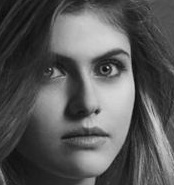

____________________________________________________

1001/17534 images in 6/105 folders proceeded


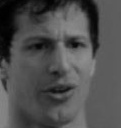

____________________________________________________

2001/17534 images in 13/105 folders proceeded


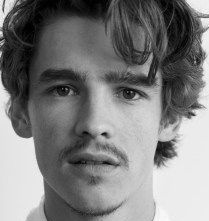

____________________________________________________

3001/17534 images in 19/105 folders proceeded


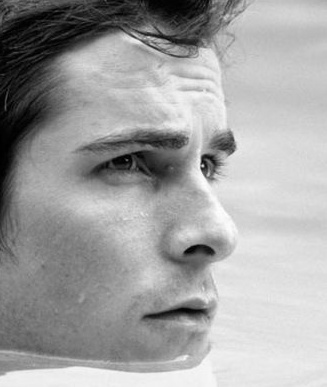

____________________________________________________

4001/17534 images in 26/105 folders proceeded


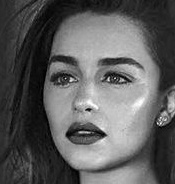

____________________________________________________

5001/17534 images in 31/105 folders proceeded


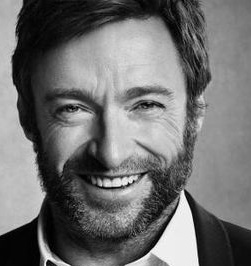

____________________________________________________

6001/17534 images in 37/105 folders proceeded


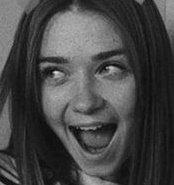

____________________________________________________

7001/17534 images in 44/105 folders proceeded


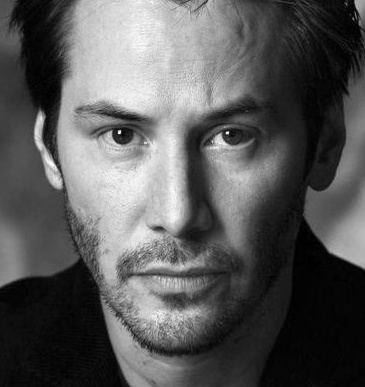

____________________________________________________

8001/17534 images in 50/105 folders proceeded


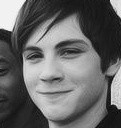

____________________________________________________

9001/17534 images in 55/105 folders proceeded


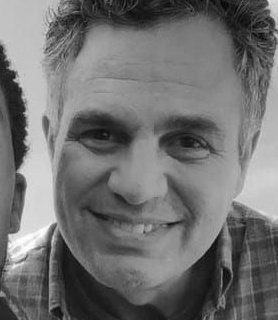

____________________________________________________

10001/17534 images in 62/105 folders proceeded


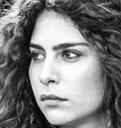

____________________________________________________

11001/17534 images in 68/105 folders proceeded


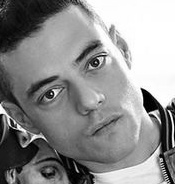

____________________________________________________

12001/17534 images in 74/105 folders proceeded


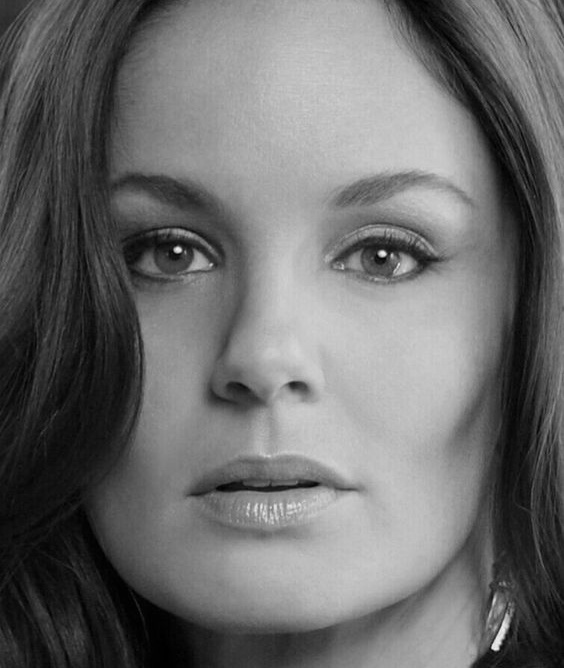

____________________________________________________

13001/17534 images in 80/105 folders proceeded


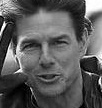

____________________________________________________

14001/17534 images in 86/105 folders proceeded


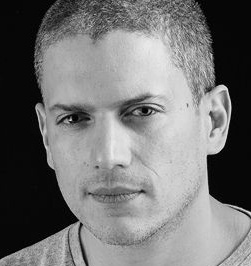

____________________________________________________

15001/17534 images in 91/105 folders proceeded


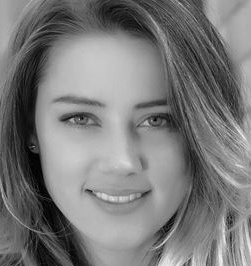

____________________________________________________

16001/17534 images in 97/105 folders proceeded


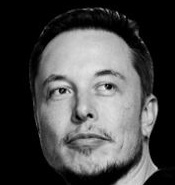

____________________________________________________

17001/17534 images in 103/105 folders proceeded


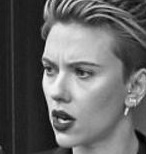

____________________________________________________



In [ ]:
# Face cascade
X = []
Y = []
cur_id = -1
count = 0

class_num = 105
cur_class = -2

for root, dirs, files in os.walk(IMAGE_DIR):
  cur_class += 1
  if cur_class == class_num:
    break

  for file in files:
    if file.endswith('.jpg'):
      count += 1

      path = os.path.join(root, file)
      image = cv2.imread(path, 0)

      X.append(image)
      Y.append(cur_id)

      if count % 1000 == 1:
          print(str(count) + '/17534 images in ' + str(cur_id + 1) + '/105 folders proceeded')
          cv2_imshow(image)
          print('____________________________________________________\n')

  cur_id += 1

del cur_id
del count
del cur_class

In [ ]:
arr = [0] * class_num
for i in range(len(X)):
  arr[Y[i]] += 1
print(arr)

[225, 139, 152, 213, 117, 196, 203, 124, 162, 126, 122, 138, 209, 102, 169, 166, 159, 176, 154, 98, 181, 146, 141, 162, 158, 210, 139, 211, 187, 195, 179, 127, 159, 156, 184, 180, 141, 167, 113, 182, 117, 177, 226, 160, 171, 237, 150, 169, 86, 212, 192, 193, 122, 161, 178, 209, 95, 178, 191, 175, 105, 133, 198, 166, 116, 126, 171, 160, 178, 148, 133, 156, 233, 159, 186, 154, 204, 159, 131, 192, 198, 181, 189, 133, 167, 179, 191, 138, 186, 211, 218, 119, 197, 162, 188, 221, 135, 199, 183, 106, 203, 221, 201, 154, 180]


## 2.2. Split data and train

### 2.2.1. Splitting data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

### 2.2.2. Data augmentation

In [ ]:
from imgaug import augmenters as iaa

seq = iaa.Sequential([
    iaa.Affine(rotate=(-15, 15)),
    iaa.AdditiveGaussianNoise(scale=(10, 45))
])

In [ ]:
face_cascade = cv2.CascadeClassifier('/usr/local/lib/python3.7/dist-packages/cv2/data/haarcascade_frontalface_alt2.xml')

#### 2.2.2.1. Testing the augmentation

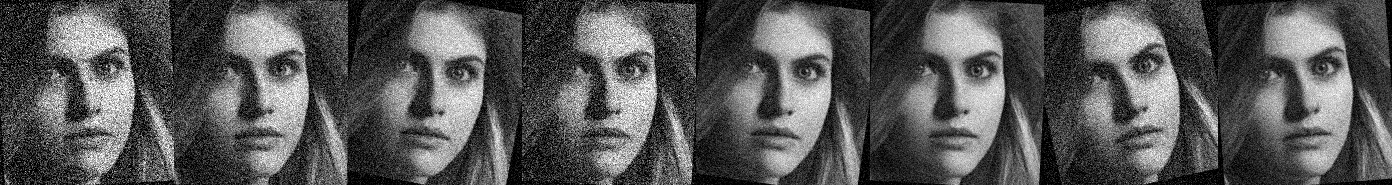

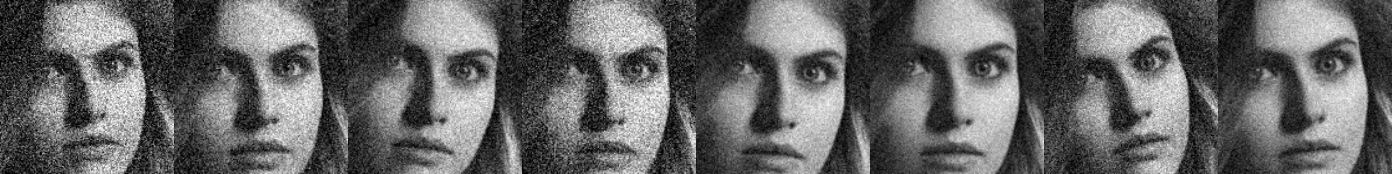

Face detected in 96% of the images.


In [ ]:
images = [X[0]] * 100

images_aug = seq(images=images)
cv2_imshow(np.hstack(images_aug[:8]))

faces = []
for image in images_aug:
  detected_faces = face_cascade.detectMultiScale(image, minNeighbors=5)
  for x, y, w, h in detected_faces:
    faces.append(cv2.resize(image[y:y+h, x:x+w], (174,174)))
    break
cv2_imshow(np.hstack(faces[:8]))

print('Face detected in', str(len(faces)) + '% of the images.')

del images_aug
del faces

#### 2.2.2.2. Apply it to the train set

In [ ]:
x_train = []
y_train = []

size = len(X_train)
for i in range(size):
  label = Y_train[i]
  images = [X_train[i]] * 5
  images = seq(images=images)
  images.append(X_train[i])
  for image in images:
    detected_faces = face_cascade.detectMultiScale(image, minNeighbors=5)
    if len(detected_faces) == 0:
      continue
    for x, y, w, h in detected_faces:
      x_train.append(image[y:y+h, x:x+w])
      y_train.append(label)
      break
  if i % 100 == 1:
    print(str(i) + '/' + str(size) + ' images proceeded')
del size

1/13151 images proceeded
101/13151 images proceeded
201/13151 images proceeded
301/13151 images proceeded
401/13151 images proceeded
501/13151 images proceeded
601/13151 images proceeded
701/13151 images proceeded
801/13151 images proceeded
901/13151 images proceeded
1001/13151 images proceeded
1101/13151 images proceeded
1201/13151 images proceeded
1301/13151 images proceeded
1401/13151 images proceeded
1501/13151 images proceeded
1601/13151 images proceeded
1701/13151 images proceeded
1801/13151 images proceeded
1901/13151 images proceeded
2001/13151 images proceeded
2101/13151 images proceeded
2201/13151 images proceeded
2301/13151 images proceeded
2401/13151 images proceeded
2501/13151 images proceeded
2601/13151 images proceeded
2701/13151 images proceeded
2801/13151 images proceeded
2901/13151 images proceeded
3001/13151 images proceeded
3101/13151 images proceeded
3201/13151 images proceeded
3301/13151 images proceeded
3401/13151 images proceeded
3501/13151 images proceeded
3601

### 2.2.2. Training the data with LBPH algorithm

In [ ]:
# LBPH recognizer
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(x_train, np.array(y_train))

In [ ]:
def predict(image):
  faces = face_cascade.detectMultiScale(image, minNeighbors=5)
  for x,y,w,h in faces:
    face = image[y:y+h, x:x+w]
    label, conf = recognizer.predict(face)
    return label, conf, face
  return -1, 10000, []

In [ ]:
import time

# Predicted LBPH data
x_test = []
y_test = []
y_predicted = []
y_conf = []

size = str(len(X_test))
count = 0

total_time = 0

for i in range(len(X_test)):
  count += 1
  if count % 50 == 1:
    print('Predicted', str(count) + '/' + size, 'faces.')

  begin = time.time()
  label, conf, face = predict(X_test[i])
  end = time.time()
  total_time += end - begin

  if label != -1:
    x_test.append(face)
    y_test.append(Y_test[i])
    y_predicted.append(label)
    y_conf.append(conf)

del count
del size

Predicted 1/4384 faces.
Predicted 51/4384 faces.
Predicted 101/4384 faces.
Predicted 151/4384 faces.
Predicted 201/4384 faces.
Predicted 251/4384 faces.
Predicted 301/4384 faces.
Predicted 351/4384 faces.
Predicted 401/4384 faces.
Predicted 451/4384 faces.
Predicted 501/4384 faces.
Predicted 551/4384 faces.
Predicted 601/4384 faces.
Predicted 651/4384 faces.
Predicted 701/4384 faces.
Predicted 751/4384 faces.
Predicted 801/4384 faces.
Predicted 851/4384 faces.
Predicted 901/4384 faces.
Predicted 951/4384 faces.
Predicted 1001/4384 faces.
Predicted 1051/4384 faces.
Predicted 1101/4384 faces.
Predicted 1151/4384 faces.
Predicted 1201/4384 faces.
Predicted 1251/4384 faces.
Predicted 1301/4384 faces.
Predicted 1351/4384 faces.
Predicted 1401/4384 faces.
Predicted 1451/4384 faces.
Predicted 1501/4384 faces.
Predicted 1551/4384 faces.
Predicted 1601/4384 faces.
Predicted 1651/4384 faces.
Predicted 1701/4384 faces.
Predicted 1751/4384 faces.
Predicted 1801/4384 faces.
Predicted 1851/4384 face

In [ ]:
print('Average running time per image:', total_time / len(x_test), 'second(s)')

Average running time per image: 5.26564996888644 second(s)


## 3. Result evaluation

## 3.1. Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.2111111111111111

## 3.2. Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[26,  0,  0, ...,  1,  0,  0],
       [ 0,  5,  0, ...,  0,  0,  1],
       [ 0,  0, 12, ...,  0,  0,  0],
       ...,
       [ 2,  0,  0, ...,  8,  0,  0],
       [ 0,  0,  0, ...,  1, 10,  0],
       [ 0,  0,  0, ...,  0,  1,  8]])

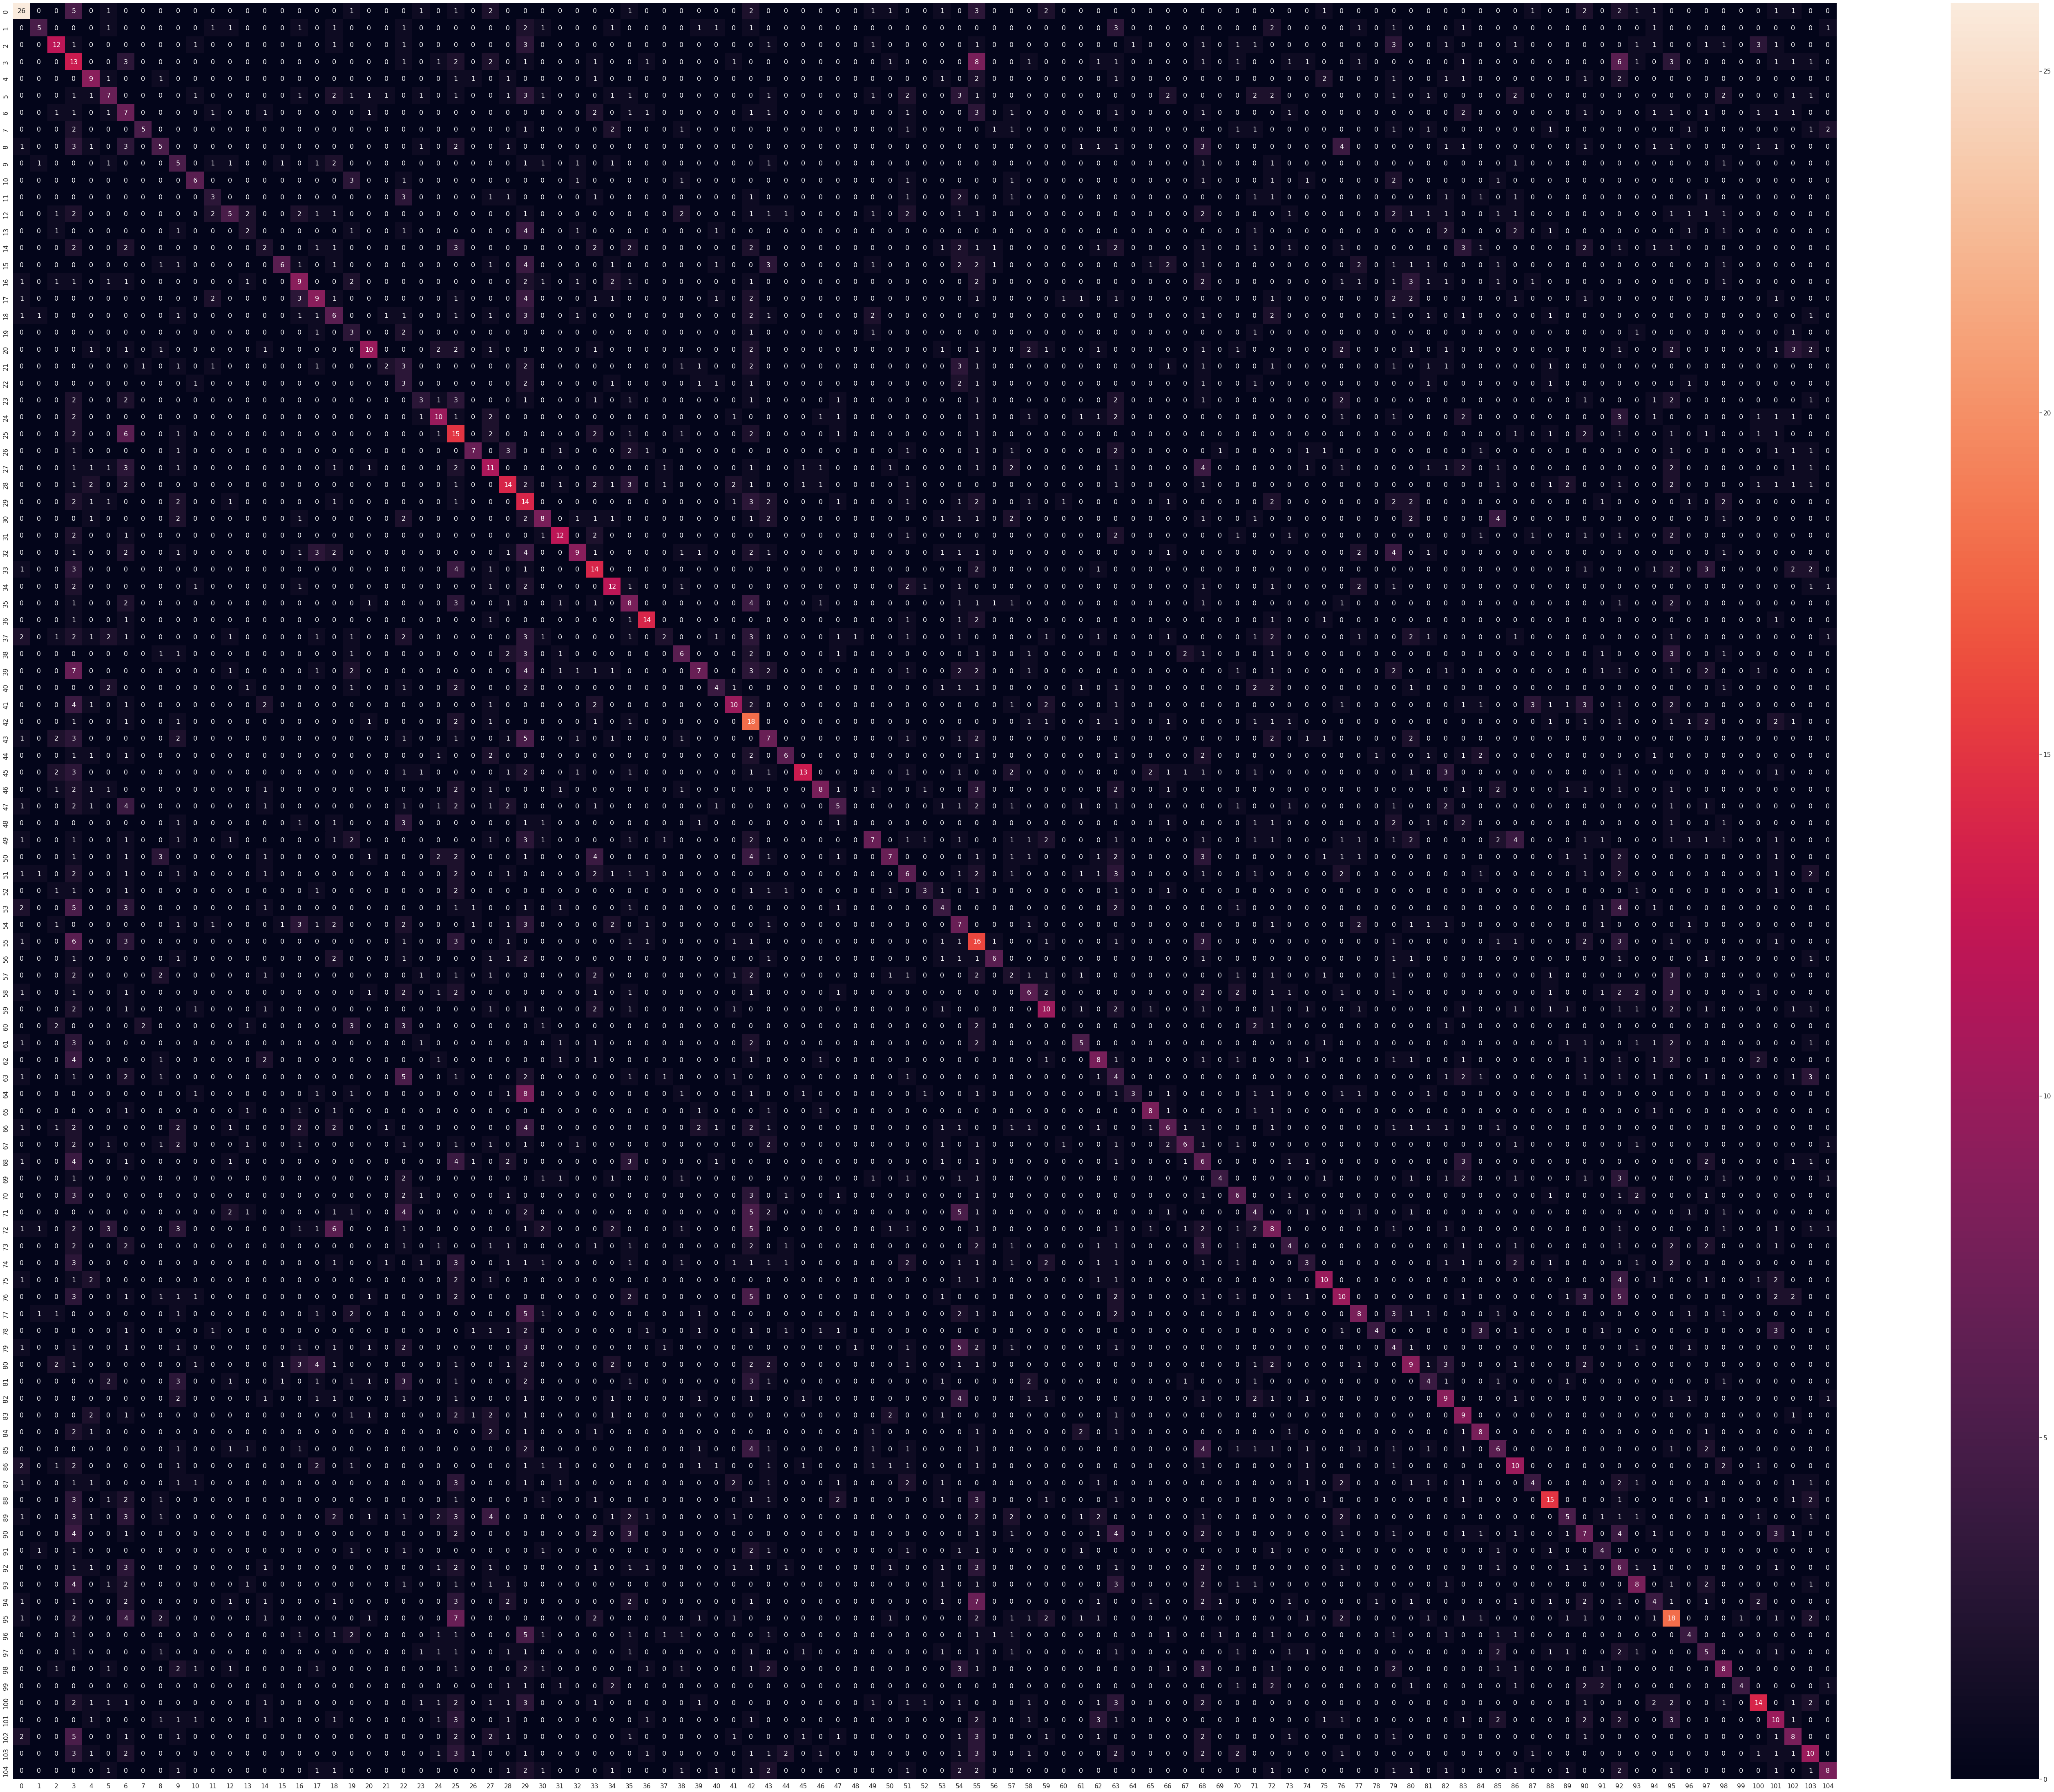

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()

## 3.3. 'Confidence' measurements

In [ ]:
a_preds = []
i_preds = []

for i in range(len(y_predicted)):
  if y_predicted[i] == y_test[i]:
    a_preds.append(y_conf[i])
  else:
    if y_conf[i] != 1000:
      i_preds.append(y_conf[i])

a_preds.sort()
i_preds.sort()

In [ ]:
print(a_preds)
print(i_preds)

[0.5108480074491212, 3.1126974049148757, 13.143127427620048, 13.653026547301087, 14.435208752602957, 18.739515482499986, 19.10159385902913, 19.103198732876148, 19.742400204412814, 19.876079193925225, 20.17666374698375, 20.32325632708747, 20.365579967988108, 20.98577624593619, 21.15743666243797, 22.754836607894067, 23.395809688668546, 23.6122312568359, 23.752861017470106, 23.862001647248796, 23.874255124347073, 24.076506754865914, 24.134051263667363, 24.522508482468012, 24.564469199076623, 24.908545352389496, 24.96776774761206, 25.153841332837327, 25.21570057113599, 25.297335787557316, 25.336636139678337, 25.766559105515995, 25.80265977940265, 25.817034461587383, 26.765924509046343, 26.852542654382745, 26.880990801492207, 26.93289425564646, 26.997685160367684, 27.18530875825028, 27.498953464409023, 27.691146335891233, 27.82842365036966, 27.831343909354352, 27.884222364888466, 28.1270634238438, 28.24775234064989, 28.807785753483937, 28.882161465942648, 28.901601484409525, 29.002303669056

In [ ]:
import pandas as pd
INTERVALS_NUM = 10

temp = pd.cut(a_preds, INTERVALS_NUM)
a_preds = []
for data in temp:
  a_preds.append((data.left + data.right) / 2)

temp = pd.cut(i_preds, INTERVALS_NUM)
i_preds = []
for data in temp:
  i_preds.append((data.left + data.right) / 2)

del temp

In [ ]:
a_vals = []
a_dens = []
i_vals = []
i_dens = []

temp = a_preds[0]
count = 0
for x in a_preds:
  if x == temp:
    count += 1
  else:
    a_vals.append(temp)
    a_dens.append(float(count/len(a_preds)))
    temp = x
    count = 1
if count != 0:
  a_vals.append(temp)
  a_dens.append(float(count/len(a_preds)))

temp = i_preds[0]
count = 0
for x in i_preds:
  if x == temp:
    count += 1
  else:
    i_vals.append(temp)
    i_dens.append(float(count/len(i_preds)))
    temp = x
    count = 1
if count != 0:
  i_vals.append(temp)
  i_dens.append(float(count/len(i_preds)))

del temp
del count

In [ ]:
print('a_vals =', a_vals)
print('a_dens =', a_dens)
print('i_vals =', i_vals)
print('i_dens =', i_dens)

a_vals = [6.4105, 18.3885, 30.3075, 42.226, 54.1445, 66.063, 77.98150000000001, 89.9005, 101.819, 113.73750000000001]
a_dens = [0.0025673940949935813, 0.026957637997432605, 0.13350449293966624, 0.18870346598202825, 0.18870346598202825, 0.1797175866495507, 0.12836970474967907, 0.09370988446726572, 0.05006418485237484, 0.007702182284980745]
i_vals = [25.577, 45.3235, 64.97200000000001, 84.62049999999999, 104.269, 123.917, 143.5655, 182.8625, 202.51100000000002]
i_dens = [0.09893507385778083, 0.31913431810374443, 0.2916523531432497, 0.1951219512195122, 0.08656818962555823, 0.007214015802129852, 0.0006870491240123669, 0.00034352456200618345, 0.00034352456200618345]


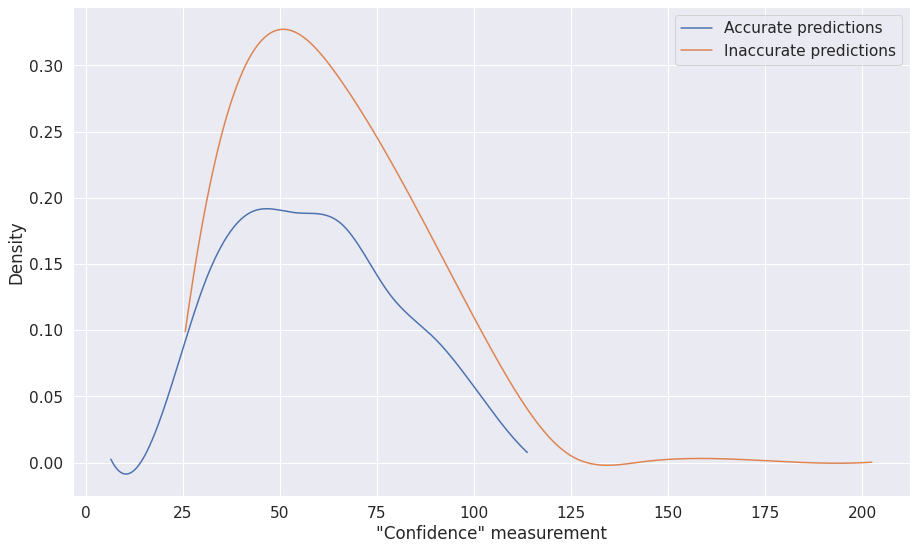

In [ ]:
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))

# Accurate predictions
X_Y_Spline = make_interp_spline(a_vals, a_dens)
X_ = np.linspace(a_vals[0], a_vals[-1], 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_, label = 'Accurate predictions')

# Inaccurate predictions
X_Y_Spline = make_interp_spline(i_vals, i_dens)
X_ = np.linspace(i_vals[0], i_vals[-1], 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_, label = 'Inaccurate predictions')

# Plot
plt.legend()
plt.xlabel('"Confidence" measurement')
plt.ylabel('Density')
plt.show()

# Free unused memory
del X_Y_Spline
del X_
del Y_